# **Creating a Movie Recommender System**

# The Process

![Data Science Overview](https://gitlab.com/staylornc/chicktechaiworkshopncsu/-/raw/master/Movie%20Recommender/assets/images/DataScienceOverview.png)

[Image Reference](https://www.oreilly.com/library/view/architectural-patterns/9781787287495/5c8b6daa-6c72-4e9e-a374-6c1c5f31ee0f.xhtml)

# The Tools

![Data Science Tools](https://gitlab.com/staylornc/chicktechaiworkshopncsu/-/raw/master/Movie%20Recommender/assets/images/DataScienceTools.png)

[Image Reference](http://datasciencecornwall.blogspot.com/2018/09/python-for-data-science-top-10-tools.html)

We are working in a Jupyter Notebook!

In [1]:
# This program prints Hello, world!
print('Hello, world!')

Hello, world!


# Step 1 - Determine the problem
What is the question we are trying to answer? 

Have you ever wondered how Spotify or Pandora suggest songs to you based on what is in your playlist? Or when you shop on the American Eagle website how does it know to recommend those "Frequently bought together items?" These types of recommendations are now part of our daily lives. They may seem very simple on the surface, but they are actually complext mathematical systems and statistical algorithms used to predict these recommendations. 

Today, we are going to create a simple movie recommender system using Python.

# Step 2 - Collect Data

We will be using the TMDB [DataSet](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata)

# Step 3 - Explore the Data
This is usually an iterative process. What is in our data and how can we use it, maniuplate it, and understand it to solve our problem?

We will use the NumPy and Pandas libraries to help us with this process. NumPy is the foundational library used for computational data science with Python. We use functions in this library to do the math "heavy lifting". Pandas is based on NumPy and is mainly used for data manipulation 

Since we are creating a movie recommender, it makes sense to take a peek at the movie data first. 

Let's explore some details about it in the Data section of the notebook. About how many movies does it include? When was it last updated?

Now, let's import a few useful libraries. The pandas library is used to work with our data and NumPy adds some other tools to work with our data. Go ahead and run the next cell by selecting it and hitting the run button. 

In [2]:
import pandas as pd 
import numpy as np 

Let's load the data now. This will load each of the data sets associated with this notebook into the most used pandas data structure,a DataFrame, which basically looks like a table. What does this look like?

In [3]:
movies_credits=pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_credits.csv')
movies_metadata=pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_movies.csv')

We've just loaded each dataset into a dataframe. Let's take a look.

In [4]:
movies_credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
movies_metadata.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


The first dataset contains the following features:-

* movie_id - A unique identifier for each movie.
* cast - The name of lead and supporting actors.
* crew - The name of Director, Editor, Composer, Writer etc.

The second dataset has the following features:- 

* budget - The budget in which the movie was made.
* genre - The genre of the movie, Action, Comedy ,Thriller etc.
* homepage - A link to the homepage of the movie.
* id - This is infact the movie_id as in the first dataset.
* keywords - The keywords or tags related to the movie.
* original_language - The language in which the movie was made.
* original_title - The title of the movie before translation or adaptation.
* overview - A brief description of the movie.
* popularity - A numeric quantity specifying the movie popularity.
* production_companies - The production house of the movie.
* production_countries - The country in which it was produced.
* release_date - The date on which it was released.
* revenue - The worldwide revenue generated by the movie.
* runtime - The running time of the movie in minutes.
* status - "Released" or "Rumored".
* tagline - Movie's tagline.
* title - Title of the movie.
* vote_average -  average ratings the movie recieved.
* vote_count - the count of votes recieved.

We'd like to be able to use the data from both tables, so let's join the two dataset on the 'id' column. Notice that in the first dataset, there is a 'movie_id' that is in fact the same as the 'id' in the second dataset.


In [6]:
# Rename the movie_id column to id and then merge the 2 datasets
movies_credits.columns = ['id','tittle','cast','crew']
movies= movies_metadata.merge(movies_credits,on='id')

Let's take another look at our data. Notice that the new dataset, movies, now also contains the cast and crew information.

In [7]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# **Simple Recommender** 

In [8]:
#Sort movies based on the average rating above
movies = movies.sort_values('vote_average', ascending=False)

#Print the top 10 movies
movies[['title', 'vote_average', 'revenue', 'release_date']].head(10)

,title,vote_average,revenue,release_date
3519,Stiff Upper Lips,10.0,0,1998-06-12
4247,Me You and Five Bucks,10.0,0,2015-07-07
4045,"Dancer, Texas Pop. 81",10.0,565592,1998-05-01
4662,Little Big Top,10.0,0,2006-01-01
3992,Sardaarji,9.5,0,2015-06-26
2386,One Man's Hero,9.3,0,1999-08-02
2970,There Goes My Baby,8.5,123509,1994-09-02
1881,The Shawshank Redemption,8.5,28341469,1994-09-23
2796,The Prisoner of Zenda,8.4,0,1937-09-03
3337,The Godfather,8.4,245066411,1972-03-14


Have you heard of most of these movies? Why do you think that is? 

In [9]:
#Print the top 10 movies adding another column
movies[['title', 'vote_average', 'revenue', 'release_date','vote_count']].head(10)

,title,vote_average,revenue,release_date,vote_count
3519,Stiff Upper Lips,10.0,0,1998-06-12,1
4247,Me You and Five Bucks,10.0,0,2015-07-07,2
4045,"Dancer, Texas Pop. 81",10.0,565592,1998-05-01,1
4662,Little Big Top,10.0,0,2006-01-01,1
3992,Sardaarji,9.5,0,2015-06-26,2
2386,One Man's Hero,9.3,0,1999-08-02,2
2970,There Goes My Baby,8.5,123509,1994-09-02,2
1881,The Shawshank Redemption,8.5,28341469,1994-09-23,8205
2796,The Prisoner of Zenda,8.4,0,1937-09-03,11
3337,The Godfather,8.4,245066411,1972-03-14,5893


Is this a very good recommender? Why or why not?

Let's try a different way to recommend movies - using the 'popularity' of the movie. 

In [10]:
#Sort movies based on the average rating above
movies = movies.sort_values('popularity', ascending=False)

#Print the top 10 movies
movies[['title', 'vote_average', 'revenue', 'release_date', 'vote_count']].head(10)

,title,vote_average,revenue,release_date,vote_count
546,Minions,6.4,1156730962,2015-06-17,4571
95,Interstellar,8.1,675120017,2014-11-05,10867
788,Deadpool,7.4,783112979,2016-02-09,10995
94,Guardians of the Galaxy,7.9,773328629,2014-07-30,9742
127,Mad Max: Fury Road,7.2,378858340,2015-05-13,9427
28,Jurassic World,6.5,1513528810,2015-06-09,8662
199,Pirates of the Caribbean: The Curse of the Bla...,7.5,655011224,2003-07-09,6985
82,Dawn of the Planet of the Apes,7.3,710644566,2014-06-26,4410
200,The Hunger Games: Mockingjay - Part 1,6.6,752100229,2014-11-18,5584
88,Big Hero 6,7.8,652105443,2014-10-24,6135


How do these results look? Are there more recognizable movies in that list? How do you think '[popularity](https://developers.themoviedb.org/3/getting-started/popularity)' is defined?

With this, we have created a very simple movie recommender.

Text(0.5,1,'Popular Movies')

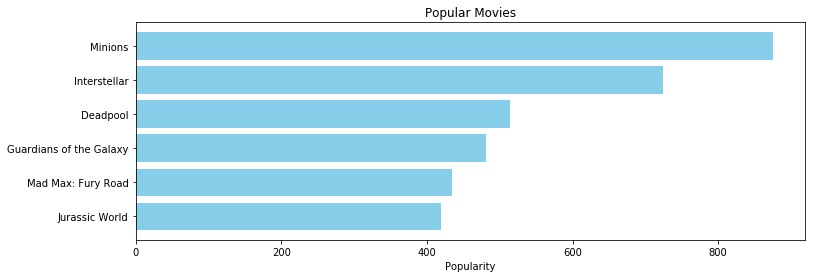

In [11]:
pop= movies.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")


# **IMDB's Recommender Algorithm** -
   Before getting started with this  -
* we need a metric to score or rate movie 
* Calculate the score for every movie 
* Sort the scores and recommend the best rated movie to the users.

We can use the average ratings of the movie as the score but using this won't be fair enough since a movie with 8.9 average rating and only 3 votes cannot be considered better than the movie with 7.8 as as average rating but 40 votes.
So, I'll be using IMDB's weighted rating (wr) which is given as :-

![](https://image.ibb.co/jYWZp9/wr.png)
where,
* v is the number of votes for the movie;
* m is the minimum votes required to be listed in the chart;
* R is the average rating of the movie; And
* C is the mean vote across the whole report

We already have v(**vote_count**) and R (**vote_average**) and C can be calculated as 

In [12]:
C= movies['vote_average'].mean()
C

6.092171559442022

So, the mean rating for all the movies is approx 6 on a scale of 10.The next step is to determine an appropriate value for m, the minimum votes required to be listed in the chart. We will use 90th percentile as our cutoff. In other words, for a movie to feature in the charts, it must have more votes than at least 90% of the movies in the list.

In [13]:
m= movies['vote_count'].quantile(0.9)
m

1838.4000000000015

Now, we can filter out the movies that qualify for the chart 

In [14]:
q_movies = movies.copy().loc[movies['vote_count'] >= m]
q_movies.shape

(481, 23)

We see that there are 481 movies which qualify to be in this list. Now, we need to calculate our metric for each qualified movie. To do this, we will define a function, **weighted_rating()** and define a new feature **score**, of which we'll calculate the value by applying this function to our DataFrame of qualified movies:

In [15]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [16]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

Finally, let's sort the DataFrame based on the score feature and output the title, vote count, vote average and weighted rating or score of the top 10 movies.

In [17]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


Text(0.5,1,"Popular Movies using IMDB's Algorithm")

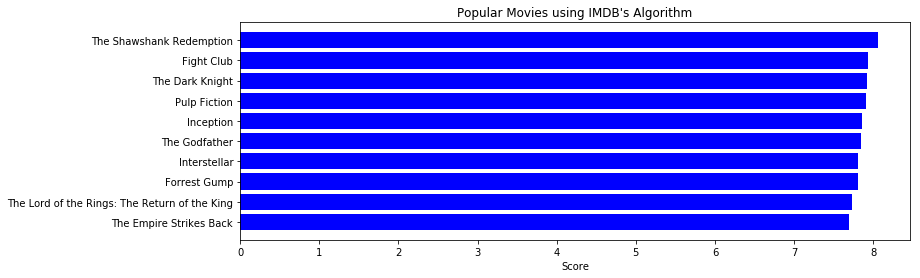

In [18]:
pop= q_movies.sort_values('score', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(10),pop['score'].head(10), align='center',
        color='blue')
plt.gca().invert_yaxis()
plt.xlabel("Score")
plt.title("Popular Movies using IMDB's Algorithm")


Hurray! We have made our second(though very basic) recommender.
Under the **Trending Now** tab of these systems we find movies that are very popular and they can just be obtained by sorting the dataset by the popularity column.

Now something to keep in mind is that these demographic recommenders provide a general chart of recommended movies to all the users. They are not sensitive to the interests and tastes of a particular user.
This is when we move on to a more refined system-  Content Basesd Filtering. 

# **Content Based Filtering**
In this recommender system the content of the movie (overview, cast, crew, keyword, tagline etc) is used to find its similarity with other movies. Then the movies that are most likely to be similar are recommended.

![](https://image.ibb.co/f6mDXU/conten.png)

## **Plot description based Recommender**

We will compute pairwise similarity scores for all movies based on their plot descriptions and recommend movies based on that similarity score. The plot description is given in the **overview** feature of our dataset. 
Let's take a look at the data. .. 

In [19]:
movies['overview'].head(5)

546    Minions Stuart, Kevin and Bob are recruited by...
95     Interstellar chronicles the adventures of a gr...
788    Deadpool tells the origin story of former Spec...
94     Light years from Earth, 26 years after being a...
127    An apocalyptic story set in the furthest reach...
Name: overview, dtype: object



TF-IDF was invented for document search and information retrieval. It works by increasing proportionally to the number of times a word appears in a document, but is offset by the number of documents that contain the word. So, words that are common in every document, such as this, what, and if, rank low even though they may appear many times, since they don’t mean much to that document in particular.


For any of you who has done even a  bit of text processing before knows we need to convert the word vector of each overview.
Now we'll compute Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each overview.

Now if you are wondering what is term frequency , it is the relative frequency of a word in a document and is given as
   **(term instances/total instances)**.
Inverse Document Frequency is the relative count of documents containing the term is given as 
**log(number of documents/documents with term)**
The overall importance of each word to the documents in which they appear is equal to **TF * IDF**

This will give you a matrix where each column represents a word in the overview vocabulary (all the words that appear in at least one document) and each row represents a movie, as before.This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

Fortunately, scikit-learn gives you a built-in TfIdfVectorizer class that produces the TF-IDF matrix in a couple of lines. That's great, isn't it? 

In [20]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
movies['overview'] = movies['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(movies['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 20978)

We see that over 20,000 different words were used to describe the 4800 movies in our dataset.

With this matrix in hand, we can now compute a similarity score. There are several candidates for this; such as the euclidean, the Pearson and the [cosine similarity scores](https://en.wikipedia.org/wiki/Cosine_similarity). There is no right answer to which score is the best. Different scores work well in different scenarios and it is often a good idea to experiment with different metrics.

We will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies. We use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate. Mathematically, it is defined as follows:
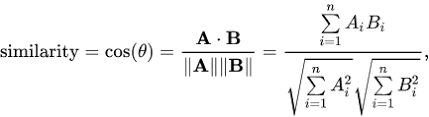

Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we will use sklearn's **linear_kernel()** instead of cosine_similarities() since it is faster.

In [21]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

We are going to define a function that takes in a movie title as an input and outputs a list of the 10 most similar movies. Firstly, for this, we need a reverse mapping of movie titles and DataFrame indices. In other words, we need a mechanism to identify the index of a movie in our metadata DataFrame, given its title.

In [22]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(movies.index, index=movies['title']).drop_duplicates()


We are now in a good position to define our recommendation function. These are the following steps we'll follow :-
* Get the index of the movie given its title.
* Get the list of cosine similarity scores for that particular movie with all movies. Convert it into a list of tuples where the first element is its position and the second is the similarity score.
* Sort the aforementioned list of tuples based on the similarity scores; that is, the second element.
* Get the top 10 elements of this list. Ignore the first element as it refers to self (the movie most similar to a particular movie is the movie itself).
* Return the titles corresponding to the indices of the top elements.

In [23]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return movies['title'].iloc[movie_indices]

In [24]:
get_recommendations('The Dark Knight Rises')

3150                  Heavy Metal
38       The Amazing Spider-Man 2
3649                Lovely, Still
2262                          CJ7
1572    Forgetting Sarah Marshall
2900      Space Battleship Yamato
1824         The Face of an Angel
20         The Amazing Spider-Man
193                   After Earth
1115           The Sweetest Thing
Name: title, dtype: object

In [25]:
get_recommendations('The Avengers')

591                Stardust
3999                    Ida
2299              Leap Year
1669            The Promise
3237                 Splash
4364    Two Girls and a Guy
1563    The Prince of Tides
809            Forrest Gump
4621             Royal Kill
2608       Black Snake Moan
Name: title, dtype: object

While our system has done a decent job of finding movies with similar plot descriptions, the quality of recommendations is not that great. "The Dark Knight Rises" returns all Batman movies while it is more likely that the people who liked that movie are more inclined to enjoy other Christopher Nolan movies. This is something that cannot be captured by the present system.

## **Credits, Genres and Keywords Based Recommender**
It goes without saying that the quality of our recommender would be increased with the usage of better metadata. That is exactly what we are going to do in this section. We are going to build a recommender based on the following metadata: the 3 top actors, the director, related genres and the movie plot keywords.

From the cast, crew and keywords features, we need to extract the three most important actors, the director and the keywords associated with that movie. Right now, our data is present in the form of "stringified" lists , we need to convert it into a safe and usable structure

In [26]:
# Parse the stringified features into their corresponding python objects
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    movies[feature] = movies[feature].apply(literal_eval)

Next, we'll write functions that will help us to extract the required information from each feature.

In [27]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [28]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [29]:
# Define new director, cast, genres and keywords features that are in a suitable form.
movies['director'] = movies['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    movies[feature] = movies[feature].apply(get_list)

In [30]:
# Print the new features of the first 3 films
movies[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
546,Minions,"[Sandra Bullock, Jon Hamm, Michael Keaton]",Kyle Balda,"[assistant, aftercreditsstinger, duringcredits...","[Family, Animation, Adventure]"
95,Interstellar,"[Matthew McConaughey, Jessica Chastain, Anne H...",Christopher Nolan,"[saving the world, artificial intelligence, fa...","[Adventure, Drama, Science Fiction]"
788,Deadpool,"[Ryan Reynolds, Morena Baccarin, Ed Skrein]",Tim Miller,"[anti hero, mercenary, marvel comic]","[Action, Adventure, Comedy]"


The next step would be to convert the names and keyword instances into lowercase and strip all the spaces between them. This is done so that our vectorizer doesn't count the Johnny of "Johnny Depp" and "Johnny Galecki" as the same.

In [31]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [32]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    movies[feature] = movies[feature].apply(clean_data)

We are now in a position to create our "metadata soup", which is a string that contains all the metadata that we want to feed to our vectorizer (namely actors, director and keywords).

In [33]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
movies['soup'] = movies.apply(create_soup, axis=1)

The next steps are the same as what we did with our plot description based recommender. One important difference is that we use the **CountVectorizer()** instead of TF-IDF. This is because we do not want to down-weight the presence of an actor/director if he or she has acted or directed in relatively more movies. It doesn't make much intuitive sense.

In [34]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(movies['soup'])

In [35]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [36]:
# Reset index of our main DataFrame and construct reverse mapping as before
movies = movies.reset_index()
indices = pd.Series(movies.index, index=movies['title'])

We can now reuse our **get_recommendations()** function by passing in the new **cosine_sim2** matrix as your second argument.

In [37]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

13               The Dark Knight
58                 Batman Begins
4771    Amidst the Devil's Wings
188                 The Prestige
3573           Romeo Is Bleeding
4245              Black November
1300                      Faster
1853                      Takers
1009                    Catwoman
1161              Gangster Squad
Name: title, dtype: object

In [38]:
get_recommendations('The Fault in Our Stars', cosine_sim2)

4684    Me You and Five Bucks
306          The Great Gatsby
402             Me Before You
749                  Brooklyn
968                 Atonement
970        A Walk to Remember
1273            The Lucky One
1428                  Flipped
1592             A Single Man
1643    Sense and Sensibility
Name: title, dtype: object

We see that our recommender has been successful in capturing more information due to more metadata and has given us (arguably) better recommendations. It is more likely that Marvels or DC comics fans will like the movies of the same production house. Therefore, to our features above we can add *production_company* . 
We can also increase the weight of the director , by adding the feature multiple times in the soup.

In [39]:
movies[movies['title'].str.contains('star', case=False)]

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew,director,soup
44,2912,11000000,"[adventure, action, sciencefiction]",http://www.starwars.com/films/star-wars-episod...,11,"[android, galaxy, hermit]",en,Star Wars,Princess Leia is captured and held hostage by ...,126.393695,"[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Twe...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1977-05-25,775398007,121.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"A long time ago in a galaxy far, far away...",Star Wars,8.1,6624,Star Wars,"[markhamill, harrisonford, carriefisher]","[{'credit_id': '52fe420dc3a36847f8000437', 'de...",georgelucas,android galaxy hermit markhamill harrisonford ...
170,47,190000000,"[action, adventure, sciencefiction]",NaN,54138,"[spacecraft, friendship, sequel]",en,Star Trek Into Darkness,When the crew of the Enterprise is called back...,78.291018,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-05-05,467365246,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Earth Will Fall,Star Trek Into Darkness,7.4,4418,Star Trek Into Darkness,"[chrispine, zacharyquinto, zoesaldana]","[{'credit_id': '52fe488dc3a36847f816d839', 'de...",j.j.abrams,spacecraft friendship sequel chrispine zachary...
190,2838,12000000,"[romance, drama]",NaN,222935,"[amsterdam, basedonnovel, supportgroup]",en,The Fault in Our Stars,Despite the tumor-shrinking medical miracle th...,74.358971,"[{""name"": ""Fox 2000 Pictures"", ""id"": 711}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2014-05-16,307166834,125.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,One Sick Love Story,The Fault in Our Stars,7.6,3759,The Fault in Our Stars,"[shailenewoodley, anselelgort, natwolff]","[{'credit_id': '585d02fbc3a3684086008ba5', 'de...",joshboone,amsterdam basedonnovel supportgroup shailenewo...
200,158,150000000,"[sciencefiction, action, adventure]",NaN,13475,"[spacecraft, teleportation, spacemission]",en,Star Trek,The fate of the galaxy rests in the hands of b...,73.616808,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",2009-05-06,385680446,127.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The future begins.,Star Trek,7.4,4518,Star Trek,"[chrispine, zacharyquinto, leonardnimoy]","[{'credit_id': '53748f960e0a267c5f003884', 'de...",j.j.abrams,spacecraft teleportation spacemission chrispin...
261,56,185000000,"[action, adventure, sciencefiction]",http://www.startrekmovie.com/,188927,"[sequel, stranded, hatred]",en,Star Trek Beyond,The USS Enterprise crew explores the furthest ...,65.352913,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-07-07,343471816,122.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Star Trek Beyond,6.6,2568,Star Trek Beyond,"[chrispine, zacharyquinto, karlurban]","[{'credit_id': '52fe4d489251416c751360bb', 'de...",justinlin,sequel stranded hatred chrispine zacharyquinto...
342,300,105000000,"[adventure, action, thriller]",NaN,563,"[moon, asteroid, spacemarine]",en,Starship Troopers,"Set in the future, the story follows a young s...",58.782359,"[{""name"": ""TriStar Pictures"", ""id"": 559}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1997-11-06,121214377,129.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The only good bug is a dead bug.,Starship Troopers,6.7,1560,Starship Troopers,"[caspervandien, dinameyer, deniserichards]","[{'credit_id': '52fe4253c3a36847f801557d', 'de...",paulverhoeven,moon asteroid spacemarine caspervandien diname...
390,233,115000000,"[adventure, action, scienc

# **Collaborative Filtering**

Our content based engine suffers from some severe limitations. It is only capable of suggesting movies which are close to a certain movie. That is, it is not capable of capturing tastes and providing recommendations across genres.

Also, the engine that we built is not really personal in that it doesn't capture the personal tastes and biases of a user. Anyone querying our engine for recommendations based on a movie will receive the same recommendations for that movie, regardless of who she/he is.

Therefore, in this section, we will use a technique called Collaborative Filtering to make recommendations to Movie Watchers.
It is basically of two types:-

*  **User based filtering**-  These systems recommend products to a user that similar users have liked. For measuring the similarity between two users we can either use pearson correlation or cosine similarity.
This filtering technique can be illustrated with an example. In the following matrixes, each row represents a user, while the columns correspond to different movies except the last one which records the similarity between that user and the target user. Each cell represents the rating that the user gives to that movie. Assume user E is the target.
![](https://cdn-images-1.medium.com/max/1000/1*9NBFo4AUQABKfoUOpE3F8Q.png)

Since user A and F do not share any movie ratings in common with user E, their similarities with user E are not defined in Pearson Correlation. Therefore, we only need to consider user B, C, and D. Based on Pearson Correlation, we can compute the following similarity.
![](https://cdn-images-1.medium.com/max/1000/1*jZIMJzKM1hKTFftHfcSxRw.png)

From the above table we can see that user D is very different from user E as the Pearson Correlation between them is negative. He rated Me Before You higher than his rating average, while user E did the opposite. Now, we can start to fill in the blank for the movies that user E has not rated based on other users.
![](https://cdn-images-1.medium.com/max/1000/1*9TC6BrfxYttJwiATFAIFBg.png)

Although computing user-based CF is very simple, it suffers from several problems. One main issue is that users’ preference can change over time. It indicates that precomputing the matrix based on their neighboring users may lead to bad performance. To tackle this problem, we can apply item-based CF.

* **Item Based Collaborative Filtering** - Instead of measuring the similarity between users, the item-based CF recommends items based on their similarity with the items that the target user rated. Likewise, the similarity can be computed with Pearson Correlation or Cosine Similarity. The major difference is that, with item-based collaborative filtering, we fill in the blank vertically, as oppose to the horizontal manner that user-based CF does. The following table shows how to do so for the movie Me Before You.
![](https://cdn-images-1.medium.com/max/1000/1*LqFnWb-cm92HoMYBL840Ew.png)

It successfully avoids the problem posed by dynamic user preference as item-based CF is more static. However, several problems remain for this method. First, the main issue is ***scalability***. The computation grows with both the customer and the product. The worst case complexity is O(mn) with m users and n items. In addition, ***sparsity*** is another concern. Take a look at the above table again. Although there is only one user that rated both Matrix and Titanic rated, the similarity between them is 1. In extreme cases, we can have millions of users and the similarity between two fairly different movies could be very high simply because they have similar rank for the only user who ranked them both.



### **Single Value Decomposition**
One way to handle the scalability and sparsity issue created by CF is to leverage a **latent factor model** to capture the similarity between users and items. Essentially, we want to turn the recommendation problem into an optimization problem. We can view it as how good we are in predicting the rating for items given a user. One common metric is Root Mean Square Error (RMSE). **The lower the RMSE, the better the performance**.

Now talking about latent factor you might be wondering what is it ?It is a broad idea which describes a property or concept that a user or an item have. For instance, for music, latent factor can refer to the genre that the music belongs to. SVD decreases the dimension of the utility matrix by extracting its latent factors. Essentially, we map each user and each item into a latent space with dimension r. Therefore, it helps us better understand the relationship between users and items as they become directly comparable. The below figure illustrates this idea.

![](https://cdn-images-1.medium.com/max/800/1*GUw90kG2ltTd2k_iv3Vo0Q.png)

Now enough said , let's see how to implement this.
Since the dataset we used before did not have userId(which is necessary for collaborative filtering) let's load another dataset. We'll be using the [**Surprise** ](https://surprise.readthedocs.io/en/stable/index.html) library to implement SVD.

In [40]:
from surprise import Reader, Dataset, SVD, evaluate
reader = Reader()
ratings = pd.read_csv('../input/the-movies-dataset/ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


Note that in this dataset movies are rated on a scale of 5 unlike the earlier one.

In [41]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
data.split(n_folds=5)

In [42]:
svd = SVD()
evaluate(svd, data, measures=['RMSE', 'MAE'])

/opt/conda/lib/python3.6/site-packages/surprise/evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
/opt/conda/lib/python3.6/site-packages/surprise/dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE, MAE of algorithm SVD.

------------
Fold 1
RMSE: 0.8984
MAE:  0.6930
------------
Fold 2
RMSE: 0.8929
MAE:  0.6924
------------
Fold 3
RMSE: 0.9018
MAE:  0.6915
------------
Fold 4
RMSE: 0.8933
MAE:  0.6875
------------
Fold 5
RMSE: 0.8963
MAE:  0.6878
------------
------------
Mean RMSE: 0.8965
Mean MAE : 0.6904
------------
------------


CaseInsensitiveDefaultDict(list,
                           {'rmse': [0.8983984712470693,
                             0.8929115578181098,
                             0.9017972051535558,
                             0.8933019166819605,
                             0.8963099861256064],
                            'mae': [0.6929892733837254,
                             0.6923610026205265,
                             0.6914788404998499,
                             0.6874520083737728,
                             0.6877846440257281]})

We get a mean Root Mean Sqaure Error of 0.89 approx which is more than good enough for our case. Let us now train on our dataset and arrive at predictions.

In [43]:
trainset = data.build_full_trainset()
svd.fit(trainset)

Let us pick user with user Id 1  and check the ratings she/he has given.

In [44]:
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [45]:
svd.predict(1, 302, 3)

Prediction(uid=1, iid=302, r_ui=3, est=2.8003844861607226, details={'was_impossible': False})

For movie with ID 302, we get an estimated prediction of **2.618**. One startling feature of this recommender system is that it doesn't care what the movie is (or what it contains). It works purely on the basis of an assigned movie ID and tries to predict ratings based on how the other users have predicted the movie.

## **Conclusion** 
We create recommenders using demographic , content- based and collaborative filtering. While demographic filtering is very elemantary and cannot be used practically, **Hybrid Systems** can take advantage of content-based and collaborative filtering as the two approaches are proved to be almost complimentary.
This model was very baseline and only provides a fundamental framework to start with.

I would like to mention some excellent refereces that I learned from
1. [https://hackernoon.com/introduction-to-recommender-system-part-1-collaborative-filtering-singular-value-decomposition-44c9659c5e75](https://hackernoon.com/introduction-to-recommender-system-part-1-collaborative-filtering-singular-value-decomposition-44c9659c5e75)
2. [https://www.kaggle.com/rounakbanik/movie-recommender-systems](https://www.kaggle.com/rounakbanik/movie-recommender-systems)
3. [http://trouvus.com/wp-content/uploads/2016/03/A-hybrid-movie-recommender-system-based-on-neural-networks.pdf](http://trouvus.com/wp-content/uploads/2016/03/A-hybrid-movie-recommender-system-based-on-neural-networks.pdf)

If you enjoyed reading the kernel , hit the upvote button !
Please leave the feedback or suggestions below. 

This Notebook was based on the [Getting Started with a Movie Recommendation System](https://www.kaggle.com/code/ibtesama/getting-started-with-a-movie-recommendation-system). It was modified to be used at the RDU ChickTech High School program in December of 2022.

The rapid growth of data collection has led to a new era of information. Data is being used to create more efficient systems and this is where Recommendation Systems come into play.  Recommendation Systems are a type of **information filtering systems** as they improve the quality of search results and provides items that are more relevant to the search item or are realted to the search history of the user.  


They are used to predict the **rating** or **preference** that a user would give to an item. Almost every major tech company has applied them in some form or the other: Amazon uses it to suggest products to customers, YouTube uses it to decide which video to play next on autoplay, and Facebook uses it to recommend pages to like and people to follow. 
Moreover,  companies like Netflix and Spotify  depend highly on the effectiveness of their recommendation engines for their business and sucees.

![](https://i.kinja-img.com/gawker-media/image/upload/s--e3_2HgIC--/c_scale,f_auto,fl_progressive,q_80,w_800/1259003599478673704.jpg)

In this kernel we'll be building a baseline Movie Recommendation System using [TMDB 5000 Movie Dataset](https://www.kaggle.com/tmdb/tmdb-movie-metadata). For novices like me this kernel will pretty much serve as a foundation in recommendation systems and will provide you with something to start with. 

**So let's go!**

There are basically three types of recommender systems:-

> *  **Demographic Filtering**- They offer generalized recommendations to every user, based on movie popularity and/or genre. The System recommends the same movies to users with similar demographic features. Since each user is different , this approach is considered to be too simple. The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience.

> *  **Content Based Filtering**- They suggest similar items based on a particular item. This system uses item metadata, such as genre, director, description, actors, etc. for movies, to make these recommendations. The general idea behind these recommender systems is that if a person liked a particular item, he or she will also like an item that is similar to it.

> *  **Collaborative Filtering**- This system matches persons with similar interests and provides recommendations based on this matching. Collaborative filters do not require item metadata like its content-based counterparts.